# Data Compression

In [1]:
import pandas as pd
import sys

sys.path.append('../')

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

df_wine = pd.read_csv(
    '../data/wine.data',
    header=None
)

df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## PCA processing

### Normalize data using standard nomral distribution

In [2]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
    stratify=y,
    random_state=0)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0
1,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0
2,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
3,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0
4,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
120,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
121,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0
122,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0


In [3]:
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

pd.DataFrame(X_train_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.712259,2.220487,-0.130259,0.059629,-0.504327,-0.528316,-1.240000,0.841180,-1.052151,-0.292189,-0.200170,-0.821641,-0.629464
1,0.882292,-0.704572,1.175336,-0.090655,2.341479,1.016759,0.662995,1.088743,-0.492935,0.131521,1.339826,0.549313,1.475688
2,0.845856,-0.730230,1.175336,0.811048,0.135979,1.098079,1.163267,-0.644195,1.252496,0.258634,1.068062,0.130811,1.629349
3,0.578661,-0.473646,0.988823,-0.240939,0.776285,0.040922,0.457000,-0.644195,-0.170963,-0.376931,0.660416,0.361708,1.045438
4,-0.526554,0.090839,-0.689799,-0.391223,-0.362037,-1.146346,-1.377330,2.161513,-1.187719,0.851827,-1.015462,-1.499903,-0.183848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.158106,-1.046684,0.466585,1.261899,-1.500359,-0.528316,-0.474879,0.263534,-0.408206,-1.224349,1.611590,0.145242,-0.383607
120,0.445064,1.330995,0.354677,0.961331,0.207124,-0.853595,-1.289047,0.511097,-0.391260,0.936569,-1.151344,-1.528765,-0.014821
121,1.028035,2.297462,-0.577891,0.059629,-1.358069,-2.187238,-1.691226,0.263534,-1.628313,-0.080334,-1.694872,-1.860680,-1.044348
122,-1.303849,-1.080895,-0.316772,0.360196,0.135979,1.716108,0.074440,-1.964528,0.015443,-0.796403,0.162182,0.736917,0.403136


### Covariance Matrix and Eigenvalue
$$
\mathrm{Cov}(X_i, X_j) = \frac{1}{m-1} \sum_{k=1}^{m} (x_{ki} - \bar{x}_i)(x_{kj} - \bar{x}_j)
$$

In [4]:
import numpy as np

# assume the Xij is the Matrix
# the ith row is the ith sample
# the jth col is the jth sample of the feature

# covariance matrix[i][j] = 1/(N-1) * sigma( (X[i][n] - mu[i]) * (X[j][n] - mu[j] )
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

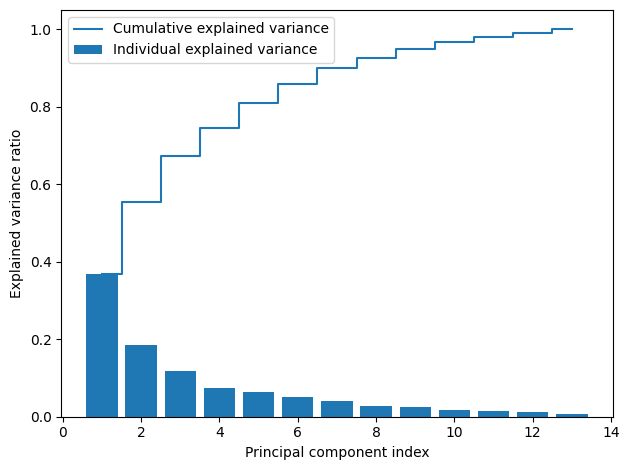

In [5]:
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center', # the bar will be in the middle of the scale mark
    label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
    label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Feature transformation

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [7]:
# v = eigen_pairs[0][1]
# v[:, np.newaxis] transfer from shape(n,) => shape(n,1)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [8]:
X_train_pca = X_train_std.dot(w)

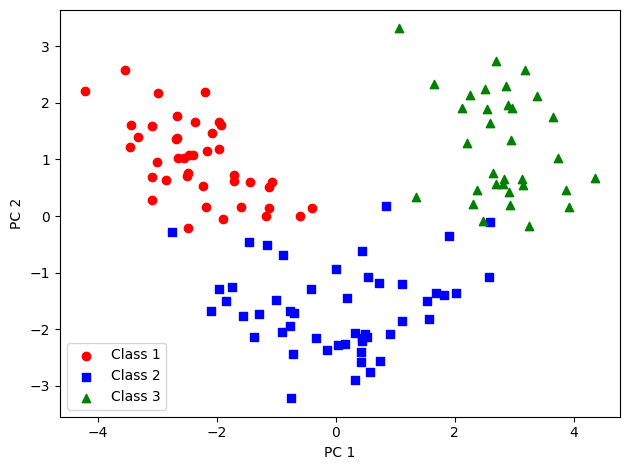

In [9]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], # the first component, i.e. X
                X_train_pca[y_train==l, 1], # the second component, i.e. Y
                c=c, # color
                label=f'Class {l}', marker=m # label
    )
plt.xlabel('PC 1') # principal component 1 
plt.ylabel('PC 2') # principal component 2
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

[[-2.38299011  0.45458499]
 [ 1.96578183  1.65376939]
 [ 2.53907598  1.02909066]
 [ 1.43010776  0.6024011 ]
 [-3.14147227  0.66214979]
 [-0.50253552 -2.08907131]
 [-0.04867722 -2.27536044]
 [-2.47888989 -0.08603318]
 [-2.01900259 -1.3538719 ]
 [-0.75156583 -2.55367947]
 [-0.72268915 -1.18404391]
 [ 3.00366211  0.94626934]
 [-2.57518878 -1.0697549 ]
 [-3.73151104  1.01968876]
 [ 1.12276518  0.13877   ]
 [-2.85996853  2.28819559]
 [ 0.74717125 -3.21746061]
 [ 1.58427878  0.16048055]
 [-3.38887101  2.11550689]
 [-3.15405473  0.54233966]
 [ 1.28036506 -1.72926871]
 [ 1.71438911  0.71745249]
 [ 1.55040291 -1.7580591 ]
 [-1.10984489 -1.20480693]
 [ 0.69108418 -1.71385374]
 [ 2.086036   -1.68453671]
 [-2.90393456  1.95258805]
 [ 2.07635784  1.47183304]
 [ 1.74756185 -1.25842546]
 [-2.59424456 -0.1056037 ]
 [ 2.50372355  0.70412212]
 [ 2.19448402  2.18657552]
 [-3.91634534  0.16136475]
 [ 1.11739618  0.51921086]
 [ 0.89996804 -2.04759575]
 [ 1.71469178  0.61392169]
 [ 2.48581303  0.76839561]
 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


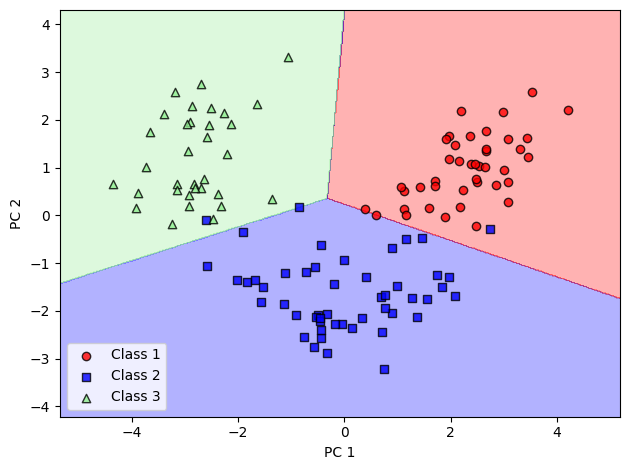

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from dlfc.plot import plot_decision_regions

# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', # one over rest
                        random_state=1, 
                        solver='lbfgs')

# dimensionality reduction:
# shape is (N, 2), N is number of samples
# PCA is transform from shape(N, d) => (N, 2)
X_train_pca = pca.fit_transform(X_train_std) 
X_test_pca = pca.transform(X_test_std)

# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()